# TP3 : Algorithme K-Means sur le Jeu de Données Iris

Ce notebook présente une implémentation de l'algorithme de clustering **K-Means** en utilisant la librairie `scikit-learn` sur le célèbre jeu de données **Iris**.

L'objectif est de regrouper les 150 fleurs d'Iris en 3 clusters distincts (car nous savons qu'il existe 3 espèces : *Iris setosa*, *Iris versicolor* et *Iris virginica*), puis de comparer les résultats du clustering non supervisé avec les étiquettes réelles.


## 1. Importation des Librairies Nécessaires

Nous importons les bibliothèques essentielles pour le traitement des données, le Machine Learning et la visualisation.


In [16]:
# Chargement des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Charge Pandas : Outil pour manipuler les données en tableaux (DataFrames).
Charge NumPy : Outil pour les calculs numériques rapides et les tableaux.
Charge Matplotlib : Outil pour créer des graphiques et des visualisations.

In [17]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix

# Configuration pour l'affichage des graphiques
%matplotlib inline

Charge KMeans : L'algorithme de clustering que nous allons utiliser.
Charge Datasets : Outil pour importer des jeux de données d'exemple (comme Iris).
Charge Metrics : Outils pour évaluer la performance du modèle (précision, matrice de confusion).
Affiche les graphiques : Commande pour que les graphiques apparaissent directement dans le notebook Jupyter.

## 2. Chargement et Exploration du Jeu de Données Iris

Le jeu de données Iris est directement disponible dans `scikit-learn` via la classe `datasets`.


In [18]:
# Chargement du jeu de données Iris
iris = datasets.load_iris()

# Affichage des informations clés pour comprendre la structure des données
print("--- Structure de l'objet Iris ---")
print(iris.keys())

print("\n--- Noms des Caractéristiques (Features) ---")
print(iris.feature_names)

print("\n--- Noms des Cibles (Classes réelles) ---")
print(iris.target_names)

print("\n--- Les 5 premières lignes des données (X) ---")
print(iris.data[:5])

print("\n--- Les 5 premières étiquettes (Y) ---")
print(iris.target[:5])


--- Structure de l'objet Iris ---
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

--- Noms des Caractéristiques (Features) ---
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

--- Noms des Cibles (Classes réelles) ---
['setosa' 'versicolor' 'virginica']

--- Les 5 premières lignes des données (X) ---
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

--- Les 5 premières étiquettes (Y) ---
[0 0 0 0 0]


iris = datasets.load_iris(): Charge le jeu de données Iris dans la variable iris.
print(iris.keys()): Montre ce que contient l'objet iris (données, noms, cibles, etc.).
print(iris.feature_names): Affiche les noms des 4 mesures (longueur/largeur des sépales et pétales).
print(iris.target_names): Affiche les noms des 3 espèces de fleurs (Setosa, Versicolor, Virginica).
print(iris.data[:5]): Affiche les 5 premières lignes des mesures (les données brutes).
print(iris.target[:5]): Affiche les 5 premières étiquettes (la classe réelle de chaque fleur, sous forme de chiffres 0, 1 ou 2).

## 3. Préparation des Données pour K-Means

Pour faciliter la manipulation et la visualisation, nous convertissons les données en DataFrames Pandas.

*   **X** (les observations) : Contient les quatre caractéristiques de la fleur.
*   **Y** (les étiquettes réelles) : Contient la classe réelle de chaque fleur (0, 1 ou 2).


In [19]:
# Création du DataFrame des observations (X)
x = pd.DataFrame(iris.data, columns=iris.feature_names)
x.columns = ['Sepal_Length', 'Sepal_width', 'Petal_Length', 'Petal_width']

# Création du DataFrame des étiquettes réelles (Y)
y = pd.DataFrame(iris.target, columns=['Targets'])

print("--- Aperçu du DataFrame X (Observations) ---")
print(x.head())
print("\n--- Aperçu du DataFrame Y (Étiquettes réelles) ---")
print(y.head())


--- Aperçu du DataFrame X (Observations) ---
   Sepal_Length  Sepal_width  Petal_Length  Petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

--- Aperçu du DataFrame Y (Étiquettes réelles) ---
   Targets
0        0
1        0
2        0
3        0
4        0


x = pd.DataFrame(iris.data, ...): Transforme les données brutes (iris.data) en un tableau structuré Pandas DataFrame appelé x.
x.columns = [...]: Renomme les colonnes du DataFrame x avec des noms plus clairs en français/anglais (ex: Sepal_Length).
y = pd.DataFrame(iris.target, ...): Transforme les étiquettes réelles (iris.target) en un DataFrame séparé appelé y avec la colonne nommée Targets
print(x.head()): Affiche les 5 premières lignes du tableau x (les mesures des fleurs).
print(y.head()): Affiche les 5 premières lignes du tableau y (les classes réelles des fleurs).

## 4. Construction et Entraînement du Modèle K-Means

K-Means est un algorithme d'apprentissage non supervisé. Nous l'instancions en spécifiant le nombre de clusters souhaité (`n_clusters=3`).


In [20]:
# Instanciation du modèle K-Means avec 3 clusters
model = KMeans(n_clusters=3, random_state=42, n_init=10)

# Entraînement du modèle sur les données X
# L'algorithme cherche à regrouper les données sans connaître les étiquettes Y
model.fit(x)

# Affichage des étiquettes de cluster prédites par le modèle
print("--- Affectation des Clusters (model.labels_) ---")
print(model.labels_)


--- Affectation des Clusters (model.labels_) ---
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


model = KMeans(...) : On prépare l'outil K-Means pour qu'il trouve 3 groupes dans les données.
model.fit(x) : On demande à l'outil de travailler sur les mesures des fleurs (x) pour trouver ces 3 groupes.
print(model.labels_) : On affiche le résultat, c'est-à-dire la liste des groupes (0, 1 ou 2) que l'outil a attribué à chaque fleur.

## 5. Visualisation des Clusters

Nous allons visualiser les données en utilisant la longueur et la largeur des pétales (les deux dernières colonnes de X) pour comparer la classification réelle et celle prédite par K-Means.


Text(0, 0.5, 'Petal Width (cm)')

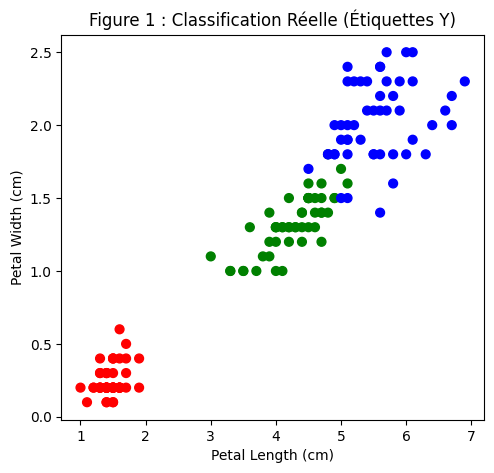

In [21]:
# Définition d'une palette de couleurs pour les 3 classes/clusters
colormap = np.array(['red', 'green', 'blue'])

# 1. Visualisation de la Classification Réelle (Figure 1)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(x.Petal_Length, x.Petal_width, c=colormap[y.Targets], s=40)
plt.title('Figure 1 : Classification Réelle (Étiquettes Y)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

colormap = np.array(...): Définit les couleurs : Crée une liste de couleurs (rouge, vert, bleu) pour représenter les 3 classes.
plt.figure(figsize=(12, 5)): Prépare la zone de dessin : Crée un grand espace pour pouvoir mettre deux graphiques côte à côte.
plt.subplot(1, 2, 1): Choisit l'emplacement : Indique que le graphique suivant sera le premier (1) d'une grille de 1 ligne et 2 colonnes.
plt.scatter(...): Dessine le graphique de dispersion : Place un point pour chaque fleur en utilisant la longueur et la largeur du pétale. La couleur est choisie selon la vraie classe (y.Targets) de la fleur.
plt.title(...), plt.xlabel(...), plt.ylabel(...): Ajoute les titres et légendes pour que le graphique soit clair.

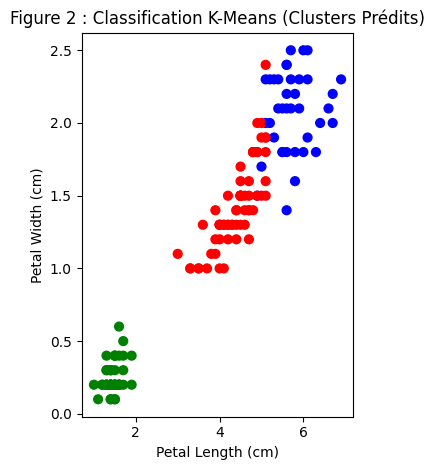

In [22]:
# 2. Visualisation de la Classification K-Means (Figure 2)
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_width, c=colormap[model.labels_], s=40)
plt.title('Figure 2 : Classification K-Means (Clusters Prédits)')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

plt.subplot(1, 2, 2): Choisit l'emplacement : Indique que ce graphique sera le deuxième (2) à côté du premier.
plt.scatter(...): Dessine le graphique de dispersion : Place un point pour chaque fleur. La couleur est choisie selon le groupe (cluster) que le modèle K-Means a trouvé (model.labels_).
plt.title(...), plt.xlabel(...), plt.ylabel(...): Ajoute les titres et légendes pour ce deuxième graphique.
plt.tight_layout(): Ajuste l'espace : S'assure que les deux graphiques ne se chevauchent pas et sont bien espacés.
plt.show(): Affiche les deux graphiques (Figure 1 et Figure 2) à l'écran.

## 6. Évaluation des Performances

Puisque K-Means est un algorithme non supervisé, les étiquettes de cluster (0, 1, 2) qu'il génère ne correspondent pas nécessairement aux étiquettes réelles (0, 1, 2). Nous devons réaligner les étiquettes prédites (`model.labels_`) pour pouvoir calculer la précision (`accuracy`).

Le TP utilise une méthode simple de réalignement: `predY = np.choose(model.labels_, [1,0,2])`.


In [23]:
# Réalignement des étiquettes de cluster pour correspondre aux étiquettes réelles
# Le mapping [1, 0, 2] est basé sur l'observation que le cluster 0 de K-Means correspond à la classe 1 réelle,
# le cluster 1 à la classe 0 réelle, et le cluster 2 à la classe 2 réelle (ce mapping peut varier).
# Le TP utilise: model.labels_ -> [1, 0, 2]
# Nous allons utiliser le mapping du TP pour reproduire le résultat:
# Cluster 0 -> Classe 1
# Cluster 1 -> Classe 0
# Cluster 2 -> Classe 2
predY = np.choose(model.labels_, [1, 0, 2])

print("--- Étiquettes réelles (Y.Targets) ---")
print(y.Targets.values)
print("\n--- Étiquettes prédites réalignées (predY) ---")
print(predY)

--- Étiquettes réelles (Y.Targets) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

--- Étiquettes prédites réalignées (predY) ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


predY = np.choose(model.labels_, [1, 0, 2]): Traduction des résultats : Cette ligne prend les résultats du clustering K-Means (model.labels_) et les convertit en de nouvelles étiquettes (predY) en utilisant la règle de correspondance [1, 0, 2].
print("--- Étiquettes réelles (Y.Targets) ---"): Titre : Affiche un titre pour la liste des vraies classes.
print(y.Targets.values): Affiche la réalité : Montre la liste des classes originales et correctes de chaque fleur.
print("\n--- Étiquettes prédites réalignées (predY) ---"): Titre : Affiche un titre pour la liste des classes prédites.
print(predY): Affiche la prédiction : Montre la liste des classes que le modèle K-Means a prédites après avoir été "traduit".

In [24]:
# Calcul de la précision (Accuracy Score)
score = accuracy_score(y.Targets, predY)
print(f"\n--- Score de Précision (Accuracy) ---")
print(f"Accuracy: {score:.4f}")


--- Score de Précision (Accuracy) ---
Accuracy: 0.8933


score = accuracy_score(...) : Calcule le pourcentage de réussite du modèle K-Means en comparant ses prédictions aux vraies classes.
print(...) : Affiche ce pourcentage (le score de précision).

In [25]:
# Calcul de la Matrice de Confusion
conf_matrix = confusion_matrix(y.Targets, predY)
print(f"\n--- Matrice de Confusion ---")
print(conf_matrix)


--- Matrice de Confusion ---
[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


conf_matrix = confusion_matrix(y.Targets, predY): Crée la Matrice de Confusion : C'est un tableau qui montre en détail où le modèle a eu raison et où il s'est trompé. Elle compare les vraies classes (y.Targets) avec les classes prédites (predY). Le résultat est stocké dans conf_matrix.
print(f"\n--- Matrice de Confusion ---"): Affiche un titre.
print(conf_matrix): Affiche le tableau de la matrice : Ce tableau permet de voir, pour chaque classe, combien de fleurs ont été correctement classées et combien ont été confondues avec les autres classes.    